# LABORATORIO 1 - Práctica 1: Preparación y visualización de Datos
---
<img src="ufv.png" width="100px" height="100px"></img> 
### Integrantes: 
* Julián Prieto Velasco   
* Guillermo Ramírez Cárdenas
* Pedro Paniagua Falo     
* Javier Muñoz Rojas

---





## **Índice**
1. [Introducción](#id0)
1. [Ejercicio 1](#id1)
1. [Ejercicio 2](#id2)
1. [Ejercicio 3](#id3)
1. [Ejercicio 4](#id4)

<div id='id0'/>

## *Introducción*

---
El alquiler de viviendas en grandes ciudades se ha convertido en un problema global debido a diversos factores, incluyendo el turismo masivo, la distribución de las ciudades y el auge de los apartamentos turísticos. En este ejercicio, utilizaremos los datos proporcionados por el portal de Airbnb para analizar la situación del alquiler de viviendas en la ciudad de New York.

A través del análisis de los datos, buscaremos responder a varias preguntas importantes sobre la evolución de las estancias en la ciudad y cómo están afectando a la vivienda local. Este ejercicio será una valiosa oportunidad para obtener una radiografía más precisa de la ciudad y comprender mejor el problema del alquiler de viviendas.

Antes de poder realizar cualquier ejercicio primero deberemos cargar el archivo “Airbnb.csv”, en un data frame de manera que usando la librería panda lo importaremos llamándolo “AirnBNB_Dataset”, una vez cargados los datos realizamos una limpieza de elementos redundantes o anómalos, con el objetivo de mejorar la calidad de los datos y evitar manchar el análisis con datos incorrectos.

Para depurar el dataset optamos por realizar 3 tareas:

•	Eliminar datos duplicados en el data set

•	Eliminar cualquier dato que tenga un valor nulo o vacío, esto debido a que si encontramos datos con celdas vacías o nulas quieren decir que están incompletos y suponen un dato incompleto


### *Librerías*

In [1]:
#Practica 1 Notebook 1 Julián Prieto Velasco, Guillermo Ramírez Cárdenas, Pedro José Paniagua Falo, Javier Muñoz Rojas

#importación de librerias
import csv
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
#lectura del CSV
AirnBNB_Dataset = pd.read_csv('airbnb.csv')
# mostramos los primero 10 elementos del dataset
AirnBNB_Dataset.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


Comprobamos los datos anómalos o redundantes y los eliminamos

In [3]:
#Comprobación de datos anómalos o redundantes
AirnBNB_DatasetCorregido = AirnBNB_Dataset
#sumatorio de datos duplicados
print("Numero de datos duplicados: ", AirnBNB_DatasetCorregido.duplicated().sum())
#Sumatorio de datos anómalos
print("\n|Datos Null|\nTipo de dato                        Numero de datos nulos")
AirnBNB_DatasetCorregido.isnull().sum()

Numero de datos duplicados:  0

|Datos Null|
Tipo de dato                        Numero de datos nulos


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Como podemos observar en el resultado de duplicated().sum() no hay datos duplicados, gracias a la función duplicated() de pandas mantenermos los datos no duplicados. Es decir, todos.
También mostramos el número de datos nulos que tenemos en cada variable de nuestro DataSet, pasamos a limpiarlo para evitar conflictos al analizar los datos.


In [4]:
#Eliminacion de los datos nulos
AirnBNB_DatasetCorregido = AirnBNB_DatasetCorregido.dropna()
print("\n|Datos Null|\nTipo de dato                     Numero de datos nulos")
AirnBNB_DatasetCorregido.isnull().sum()



|Datos Null|
Tipo de dato                     Numero de datos nulos


id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Como podemos commprobar se han eliminado todos los datos nulos.

<div id='id1'>

## *Ejercicio 1*

---
¿Teniendo en cuenta los datos proporcionados que posición en términos de popularidad/calidad se puede decir que ostenta el barrio con respectoa los demás que forma New York?

Para poder realizar esto primero debemos definir la calidad/popularidad, de acorde al enunciado debemos clasificar los apartamentos como “Muy Malos”, “Malos”, “Regulares”, “Buenos” y “Muy Buenos” y en base al valor que se obtenga de las reseñas por mes asignarle la etiqueta “Baja”, “Media” y ”Alta” .

En nuestro caso lo que hemos realizado para definir Bajo ,Medio y Alto es hacer uso de 3 percentiles 0.33 , 0.66 y 1, donde agruparemos en 3 grupos de igual rango todos aquellos apartamentos cuyas reseñas por mes que se encuentran por debajo de 0.33 (bajo), por debajo de 0.66(medio) y por debajo de 1 (alto).


In [5]:
#Categorización de los datos

#se han dividido los datos en percentiles
Bajo = AirnBNB_DatasetCorregido["reviews_per_month"].quantile(q = 0.33)
Medio = AirnBNB_DatasetCorregido["reviews_per_month"].quantile(q = 0.66)

print("BAJO: " , Bajo,"MEDIO",  Medio)

#Creamos la columna de la de reseñas vacía
AirnBNB_DatasetCorregido = AirnBNB_DatasetCorregido.assign(reseñas = "None")


BAJO:  0.3 MEDIO 1.41


In [6]:
#rellenamos la columna de reseñas

#Añadimos las condiciones al dataset
PE_Conditions = [
    (AirnBNB_DatasetCorregido['reviews_per_month'] < Bajo),
    (AirnBNB_DatasetCorregido['reviews_per_month'] >= Bajo) & (AirnBNB_DatasetCorregido['reviews_per_month'] <= Medio),
    (AirnBNB_DatasetCorregido['reviews_per_month'] > Medio)
]
#Inicializamos los valores de las categorías
PE_Categories = ['Bajo', 'Medio', 'Alto']
#Añadimos dentrod de reseñas, las condiciones y las categorías
AirnBNB_DatasetCorregido['reseñas'] = np.select(PE_Conditions, PE_Categories)
#Mostramos los primeros 10 elementos
AirnBNB_DatasetCorregido.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,reseñas
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Bajo
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Medio
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Alto
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Bajo
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,Medio
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0,Medio
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220,Alto
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0,Medio
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188,Medio
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6,Medio


In [7]:
#Categorización de los datos

#se han dividido los datos en percentiles
Poco_disponible = AirnBNB_DatasetCorregido["availability_365"].quantile(q = 0.33)
Disponible_normalmente = AirnBNB_DatasetCorregido["availability_365"].quantile(q = 0.66)

print("Disponible normalmente: " , Disponible_normalmente,"Disponible normalmente",  Disponible_normalmente)

#Creamos la columna de la de reseñas vacía
AirnBNB_DatasetCorregido = AirnBNB_DatasetCorregido.assign(disponibilidad = "None")

Disponible normalmente:  157.0 Disponible normalmente 157.0


In [8]:
#Añadimos las condiciones, las categorias y mostramos los 10 primeros
PE_Conditions = [
    (AirnBNB_DatasetCorregido['availability_365'] < Poco_disponible),
    (AirnBNB_DatasetCorregido['availability_365'] >= Poco_disponible) & (AirnBNB_DatasetCorregido['availability_365'] <= Disponible_normalmente),
    (AirnBNB_DatasetCorregido['availability_365'] > Disponible_normalmente)
]

PE_Categories = ['Poco disponible', 'Disponible normalmente', 'Altamente disponible']

AirnBNB_DatasetCorregido['disponibilidad'] = np.select(PE_Conditions, PE_Categories)
AirnBNB_DatasetCorregido.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,reseñas,disponibilidad
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Bajo,Altamente disponible
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Medio,Altamente disponible
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Alto,Altamente disponible
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Bajo,Poco disponible
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,Medio,Disponible normalmente
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0,Medio,Poco disponible
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220,Alto,Altamente disponible
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0,Medio,Poco disponible
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188,Medio,Altamente disponible
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6,Medio,Disponible normalmente


In [9]:
#creamos la columna
AirnBNB_DatasetCorregido = AirnBNB_DatasetCorregido.assign(calidad = "None")

Una vez definido que constituye Bajo , Medio u Alto procedemos a asignar el atributo de calidad, para ello primero nos creamos en el Data Set una columna nueva llamada calidad, que al comienzo tendrá valores nulos. Posteriormente la rellenamos con las condiciones dadas en el enunciado. Esto se realiza para mantener la simplicidad y sencillez para clasificar cada apartamento. 

In [10]:
#Aquí categorizamos cada barrio por su disponibilidad y sus reseñas dándole a cada uno una categoría de calidad
PE_Conditions = [
    (AirnBNB_DatasetCorregido['disponibilidad'] == "Poco disponible") & (AirnBNB_DatasetCorregido['reseñas'] == "Bajo"),
    (AirnBNB_DatasetCorregido['disponibilidad'] == "Poco disponible") & (AirnBNB_DatasetCorregido['reseñas'] == "Medio"),
    (AirnBNB_DatasetCorregido['disponibilidad'] == "Poco disponible") & (AirnBNB_DatasetCorregido['reseñas'] == "Alto"),

    (AirnBNB_DatasetCorregido['disponibilidad'] == "Disponible normalmente") & (AirnBNB_DatasetCorregido['reseñas'] == "Bajo"),
    (AirnBNB_DatasetCorregido['disponibilidad'] == "Disponible normalmente") & (AirnBNB_DatasetCorregido['reseñas'] == "Medio"),
    (AirnBNB_DatasetCorregido['disponibilidad'] == "Disponible normalmente") & (AirnBNB_DatasetCorregido['reseñas'] == "Alto"),

    (AirnBNB_DatasetCorregido['disponibilidad'] == "Altamente disponible") & (AirnBNB_DatasetCorregido['reseñas'] == "Bajo"),
    (AirnBNB_DatasetCorregido['disponibilidad'] == "Altamente disponible") & (AirnBNB_DatasetCorregido['reseñas'] == "Medio"),
    (AirnBNB_DatasetCorregido['disponibilidad'] == "Altamente disponible") & (AirnBNB_DatasetCorregido['reseñas'] == "Alto")
]

PE_Categories = ['Bueno', 'Bueno', 'Muy bueno', "Regular", "Regular", "Bueno", "Malo", "Malo", "Muy Malo"]

AirnBNB_DatasetCorregido['calidad'] = np.select(PE_Conditions, PE_Categories)
AirnBNB_DatasetCorregido.head(10)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,reseñas,disponibilidad,calidad
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Bajo,Altamente disponible,Malo
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Medio,Altamente disponible,Malo
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Alto,Altamente disponible,Muy Malo
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Bajo,Poco disponible,Bueno
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,Medio,Disponible normalmente,Regular
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0,Medio,Poco disponible,Bueno
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220,Alto,Altamente disponible,Muy Malo
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0,Medio,Poco disponible,Bueno
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188,Medio,Altamente disponible,Malo
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6,Medio,Disponible normalmente,Regular


### ¿Cómo de popular es Williamsburg?

Una vez realizados estos procesos de transformación de datos determinamos la popularidad que ostenta el barrio de Williamsburg frente al resto. 
Para determinar esto lo que realizamos es crearnos una nueva columna llamada calidad_num, inicializada en ceros para posteriormente rellenar, debido a que calidad es una propiedad cualitativa y necesitamos que sea cuantitativa para poder realizar un análisis de ella y poder comparar los diferentes barrios por la calidad total que tienen.

De manera que para saber la calidad total que tiene un barrio definimos una serie de valores des el 1 al 5 en el que uno es lo peor, es decir Muy Malo y 5 es lo mejor Muy bueno, en función de la calidad del apartamento le asignaremos un valor numérico. 
Posteriormente con los apartamentos clasificados del 1 al 5 lo que realizaremos será crearnos un nuevo dataset a partir de este donde incluyamos la suma total de la calidad que tienen los apartamentos de cada barrio y otra variable que será la demanda total que tiene ese barrio para su uso posterior.

Una vez realizado esto podemos concluir que Williamsbourg en términos de popularidad/calidad es el más popular.


In [11]:
#Barrios más populares
#Actualizamos el dato de numero de reservas a numeros absolutos
AirnBNB_DatasetCorregido_Calidad_Num = AirnBNB_DatasetCorregido.assign(calidad_num = 0)

PE_Condiciones_Calidad = [
    (AirnBNB_DatasetCorregido_Calidad_Num['calidad'] == "Muy Malo") ,
    (AirnBNB_DatasetCorregido_Calidad_Num['calidad'] == "Malo") ,
    (AirnBNB_DatasetCorregido_Calidad_Num['calidad'] == "Regular") ,
    (AirnBNB_DatasetCorregido_Calidad_Num['calidad'] == "Bueno") ,
    (AirnBNB_DatasetCorregido_Calidad_Num['calidad'] == "Muy Bueno"),
]
PE_CalidadValues = [1, 2, 3, 4, 5]
#rellenamos la columnna con las condiciones que nos han pedido
AirnBNB_DatasetCorregido_Calidad_Num['calidad_num'] = np.select(PE_Condiciones_Calidad, PE_CalidadValues)

# Agrupar los datos por barrios y calcular la suma total de las calidades y la suma total de las últimas reservas
grouped = AirnBNB_DatasetCorregido_Calidad_Num.groupby(['neighbourhood'])[['calidad_num', 'calculated_host_listings_count']].sum().reset_index()
# Crear un nuevo DataFrame con dos columnas: suma_calidad y suma_reservas
result = pd.DataFrame({'barrio': grouped['neighbourhood'],'suma_calidad': grouped['calidad_num'], 'suma_reservas': grouped['calculated_host_listings_count']})

# Ordenar el nuevo DataFrame por la cantidad de reservas
top_neighbourhoods = result.sort_values('suma_calidad', ascending=False)

top_neighbourhoods.head(5)

,barrio,suma_calidad,suma_reservas
212,Williamsburg,9993,4560
13,Bedford-Stuyvesant,8658,8127
93,Harlem,6347,4800
28,Bushwick,5880,4670
64,East Village,4712,2762


Tras realizar esta tabla, se puede observar como Wiliamsburg es el barrio mas popular con respecto a la calidad

<div id='id2'/>

## *Ejercicio 2*

---
Explica visualmente como se distribuyen los 5 barrios más populares. Para ello utiliza un diagrama de burbuja donde el eje de las X indica el barrio y el eje Y la calidad de los apartamentos.

- En este apartado crearemos dos columnas:
    * La columna disponibilidad que junto a la columna de reservas dará lugar a la columna Calidad
    * La columna calidad que nace a partir del cruce de datos de las columnas anteriores

Para la explicar como se distribuyen estos 5 barrios mas populares en base a lo solicitados que se encuentren en valores absolutos haremos uso del dataset creado anteriormente con la suma total de la calidad y de las reservas, siendo esta ultima una suma total del atributo “calculated_host_listings_count” de cada apartamento que se encuentra en cada barrio. 

### Preparación del Dataframe para representar gráficamente

In [12]:
# Ordenar el nuevo DataFrame por la cantidad de reservas
top_neighbourhoods = result.sort_values('suma_reservas', ascending=False)

top_neighbourhoods = top_neighbourhoods.head(5)
top_neighbourhoods.head(5)

,barrio,suma_calidad,suma_reservas
73,Financial District,1167,60187
136,Murray Hill,878,14141
94,Hell's Kitchen,4093,14059
199,Upper East Side,4125,9182
126,Midtown,2650,8995


Una vez categorizamos los distintos barrios, haremos una nueva columna llamada 'calidad-num' para poder hacer un top de 5 barrios más solicitados.

En base a esto decidimos pintar el diagrama de burbujas pedido.

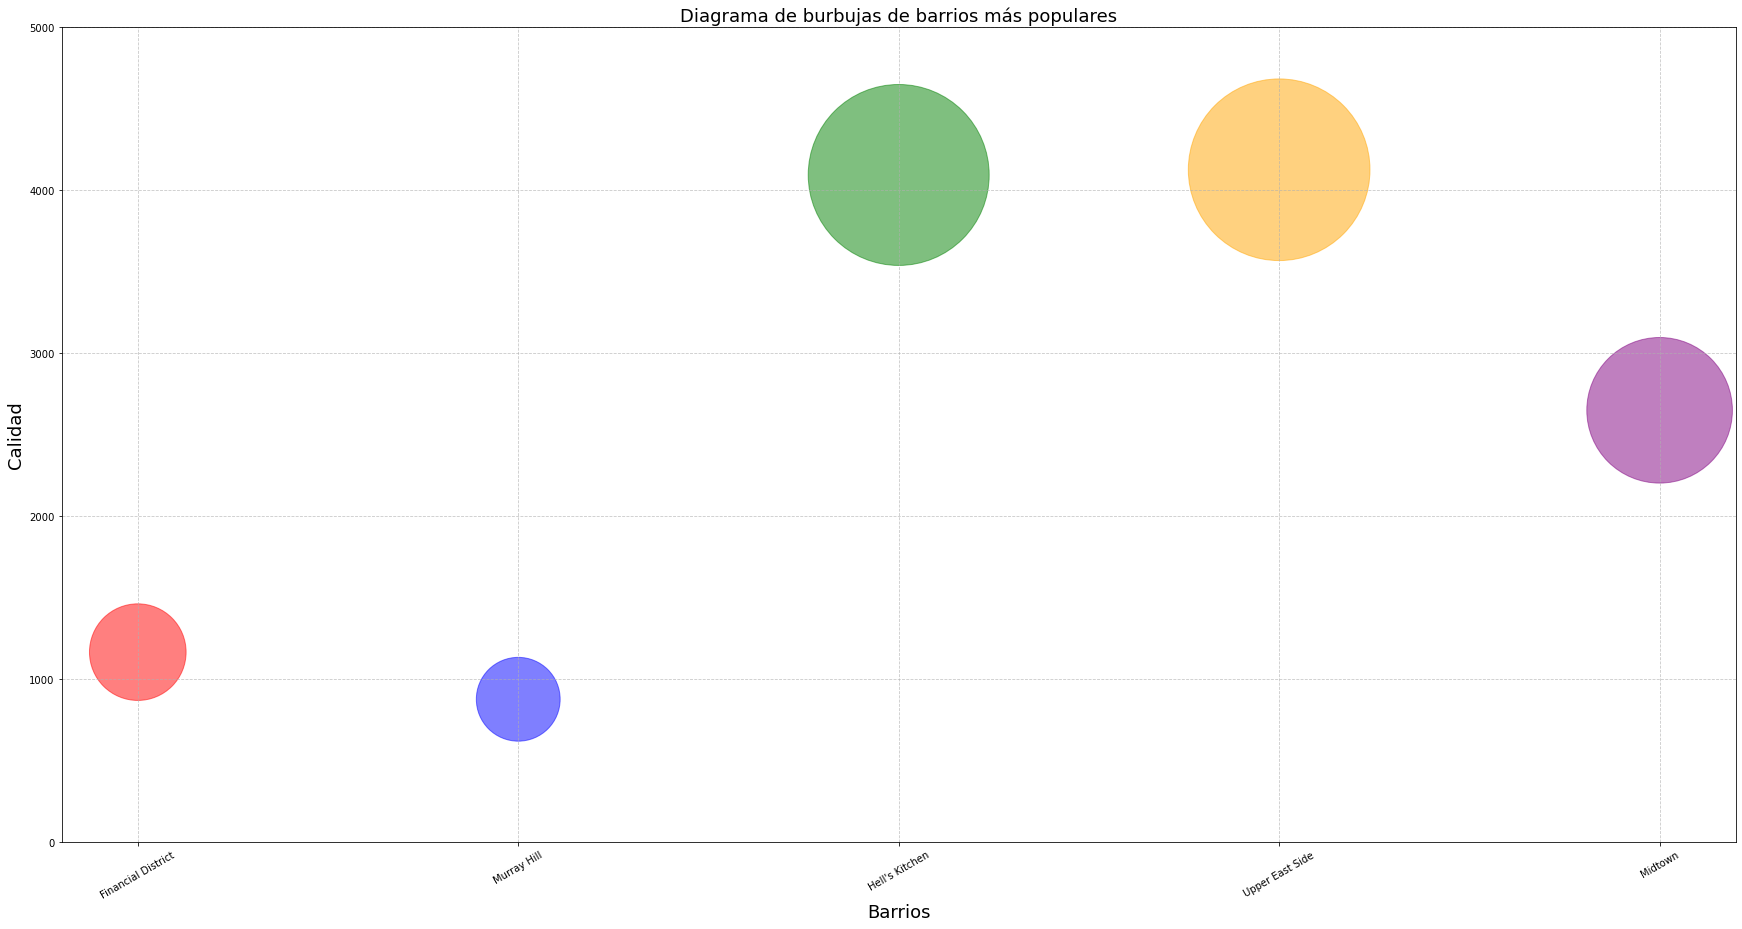

In [13]:
fig, ax = plt.subplots(figsize = (30, 15))
colors = ['red', 'blue', 'green', 'orange', 'purple']

x = top_neighbourhoods["barrio"]
y = top_neighbourhoods["suma_calidad"]

plt.scatter(x, y, s = y * 8, alpha = 0.5 ,c = colors)
plt.xlabel("Barrios", fontsize=18)
plt.ylabel("Calidad", fontsize=18)
plt.title("Diagrama de burbujas de barrios más populares", fontsize=18)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0, 5000)
plt.xticks(rotation=30)
plt.show()


En este diagrama se puede observar como los barrios de Hell’s Kitchen y Upper East Side tienen el mayor volumen de calidad en contraste con los otros barrios, este diagrama ilustra la calidad que presenta cada barrio respecto al resto no obstante para observar mejor como se distribuyen estos barrios realizamos un 2 diagrama de dispersión.

En este segundo diagrama comparamos la calidad total con las reservas que tienen y lo que se puede observar es que los barrios con mayor calidad no son los que mas reservas presentan en sus apartamentos. Del mismo modo que los que presentan una mayor cantidad de reservas no tienen la mayor calidad.


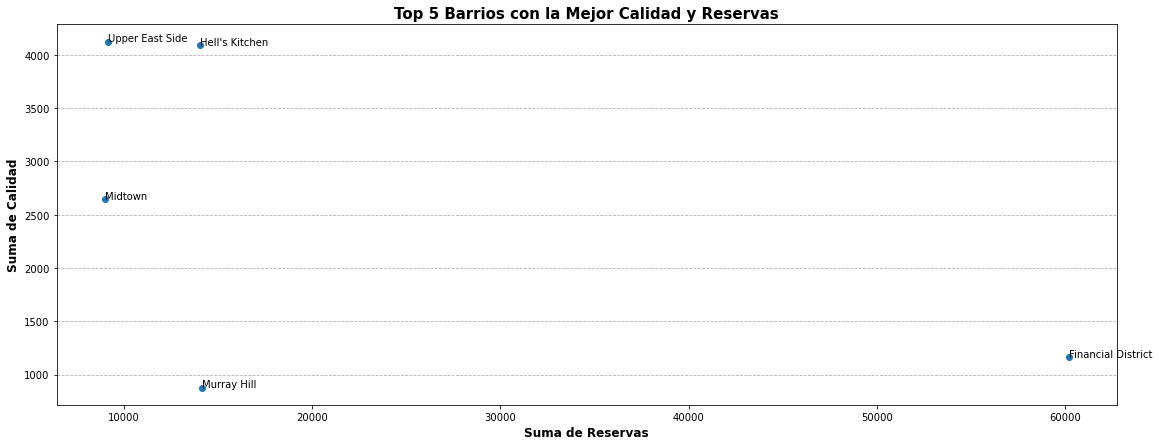

In [14]:
# Crear el diagrama de dispersión
top_neighbourhoods = top_neighbourhoods.reset_index(drop=True)
# Crear el diagrama de dispersión

fig, ax = plt.subplots(figsize=(19, 7))
plt.scatter(top_neighbourhoods['suma_reservas'], top_neighbourhoods['suma_calidad'])

# Añadir título y etiquetas de eje
ax.set_title("Top 5 Barrios con la Mejor Calidad y Reservas", fontweight='bold', fontsize=15)
ax.set_xlabel("Suma de Reservas", fontweight='bold', fontsize=12)
ax.set_ylabel("Suma de Calidad", fontweight='bold', fontsize=12)
plt.grid(axis='y', linestyle='--')
# Añadir etiquetas para cada barrio
for i, txt in enumerate(top_neighbourhoods['barrio']):
    ax.annotate(txt, (top_neighbourhoods['suma_reservas'][i], top_neighbourhoods['suma_calidad'][i]), rotation=0)

# Mostrar el diagrama
plt.show()

<div id='id3'/>

## *Ejercicio 3*

---
En este ejercicio se nos pide mostrar la diferencia entre el alquiler de un apartamento entero y una habitación privada.

Para poder obtener una conclusión haremos uso de los 5 barrios anteriormente obtenidos para poder obtener el coste promedio de un apartamento y una habitación privada en cada uno de estos 5 barrios, lo que realizaremos primero será buscar en el datasaet todos los apartamentos que pertenezcan al barrio pedido y posteriormente agruparlos el tipo de habitación y realizaremos la media de su coste. 

Utilizamos la media para así poder realizar una comparación del coste entre los diferentes barrios

### Preparación de los datos del dataframe para la representación gráfica
Para ello primero eliminamos todos aquellos apartamentos cuyo tipo sea de habitación compartida pues para este ejercicio no son necesarios.

Una vez sabido los 5 barrios mas populares, los buscamos en nuestro dataframe y poteriormente calculamos el coste medio de un apatamento completo y una habitación para posteriormente contrastarlo en el diagrama de cajas y bigotes

In [28]:
#Apartado 3
#Seleccionamos los barrios mas populares del dataset
AirnBNB_DatasetCorregido1 = AirnBNB_DatasetCorregido[~(AirnBNB_DatasetCorregido['room_type'] == 'Shared room')]

Barrios_Populares1 = AirnBNB_DatasetCorregido1[AirnBNB_DatasetCorregido1['neighbourhood'] == 'Financial District']
Barrios_Populares2 = AirnBNB_DatasetCorregido1[AirnBNB_DatasetCorregido1['neighbourhood'] == 'Murray Hill']
Barrios_Populares3 = AirnBNB_DatasetCorregido1[AirnBNB_DatasetCorregido1['neighbourhood'] == "Hell's Kitchen"]
Barrios_Populares4 = AirnBNB_DatasetCorregido1[AirnBNB_DatasetCorregido1['neighbourhood'] == 'Upper East Side']
Barrios_Populares5 = AirnBNB_DatasetCorregido1[AirnBNB_DatasetCorregido1['neighbourhood'] == 'Midtown']

#Obtenemos la media de coste por habitacion privada y compartida
Barrios_Populares1 = Barrios_Populares1.groupby(["neighbourhood" , "room_type"]).agg({"price":"mean"})
Barrios_Populares2 = Barrios_Populares2.groupby(["neighbourhood" , "room_type"]).agg({"price":"mean"})
Barrios_Populares3 = Barrios_Populares3.groupby(["neighbourhood" , "room_type"]).agg({"price":"mean"})
Barrios_Populares4 = Barrios_Populares4.groupby(["neighbourhood" , "room_type"]).agg({"price":"mean"})
Barrios_Populares5 = Barrios_Populares5.groupby(["neighbourhood" , "room_type"]).agg({"price":"mean"})

#Lo unificamos en un único Dataset
BarriosPopulares = pd.concat([Barrios_Populares1,Barrios_Populares2,Barrios_Populares3,Barrios_Populares4,Barrios_Populares5])
BarriosPopulares

price
neighbourhood      room_type                  
Financial District Entire home/apt  246.041451
                   Private room     133.907563
Murray Hill        Entire home/apt  239.333333
                   Private room     125.944444
Hell's Kitchen     Entire home/apt  233.377401
                   Private room     127.374552
Upper East Side    Entire home/apt  192.494000
                   Private room     107.913279
Midtown            Entire home/apt  289.852436
                   Private room     222.194030

### Diagrama de Cajas y Bigotes

Una vez obtenidos los precios promedio de cada tipo de habitación pintamos el diagrama 

<Figure size 2880x2880 with 0 Axes>

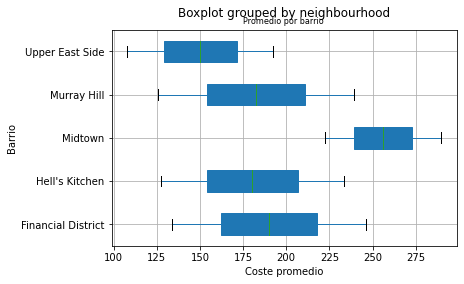

In [29]:
#Dibujamos el resultado
fig = plt.figure(figsize=(40, 40))

BarriosPopulares.boxplot(by='neighbourhood', column='price', vert=False,showfliers=False,showmeans=True,meanline=True,patch_artist=True)  
# Añadimos un titulo
plt.title("Promedio por barrio ", fontsize = 8)

# Personalizar el eje y
plt.ylabel("Barrio")

# Personalizar el eje x
plt.xlabel("Coste promedio")

plt.show()

#Barrios_Populares = AirnBNB_DatasetCorregido.groupby(["neighbourhood" , "room_type"]).agg({"price":"mean"})


Tras pintar el diagrama lo que podemos observar las siguientes propiedades:
* En general, los apartamentos enteros son más caros que las habitaciones privadas y compartidas.

* Financial District es el barrio más caro en términos de precios de los apartamentos enteros y las habitaciones privadas.

* Hell´s Kitchen y Upper East Side son los 2 barrios que cuentan con los precios más bajos del resto de barrios, ambos contado con los 2 precios mínimos más bajas de todos los barrios. 

* Midtown es el barrio más caro en términos de precios de las habitaciones privadas, mientras que el Upper East Side es el barrio con precios más bajos para este tipo de habitación.

* Midtown es el barrio con mas cantidad de apartamentos y habitaciones, teniendo una muestra mucho mas grande y variada respecto al resto de barrios .

* Si se desea una opción más asequible en términos de precios, se recomienda buscar habitaciones compartidas o apartamentos en barrios periféricos, como Hell's Kitchen o Upper East Side.

* Sin embargo, si se prioriza la ubicación y la comodidad, es posible que sea necesario pagar precios más altos en barrios como el Financial District o Midtown.


<div id='id4'/>

## *Ejercicio 4*

---

### Preparación de los datos del Dataframe para la representación gráfica

En esta situación para reflejar el aumento de reseñas a lo largo del tiempo lo que realizaremos será separar las reseñas por fecha, tomando grupos de año en año y realizando el sumatorio de todas las reseñas realizadas en dicho año y posteriormente situarlas en listas para mostrarlos.

In [ ]:
#fig, ax = plt.subplots(figsize = (50, 12))
AirnBNB_DatasetCorregido2021 = AirnBNB_DatasetCorregido

AirnBNB_DatasetCorregido2015 = AirnBNB_DatasetCorregido[(AirnBNB_DatasetCorregido['last_review'] >= '2015-01-01') & (AirnBNB_DatasetCorregido['last_review'] <= '2015-12-31')]
AirnBNB_DatasetCorregido2016 = AirnBNB_DatasetCorregido[(AirnBNB_DatasetCorregido['last_review'] >= '2016-01-01') & (AirnBNB_DatasetCorregido['last_review'] <= '2016-12-31')]
AirnBNB_DatasetCorregido2017 = AirnBNB_DatasetCorregido[(AirnBNB_DatasetCorregido['last_review'] >= '2017-01-01') & (AirnBNB_DatasetCorregido['last_review'] <= '2017-12-31')]
AirnBNB_DatasetCorregido2018 = AirnBNB_DatasetCorregido[(AirnBNB_DatasetCorregido['last_review'] >= '2018-01-01') & (AirnBNB_DatasetCorregido['last_review'] <= '2018-12-31')]
AirnBNB_DatasetCorregido2019 = AirnBNB_DatasetCorregido[(AirnBNB_DatasetCorregido['last_review'] >= '2019-01-01') & (AirnBNB_DatasetCorregido['last_review'] <= '2019-12-31')]

Reviews2015 = AirnBNB_DatasetCorregido2015['number_of_reviews'].sum()
Reviews2016 = AirnBNB_DatasetCorregido2016['number_of_reviews'].sum()
Reviews2017 = AirnBNB_DatasetCorregido2017['number_of_reviews'].sum()
Reviews2018 = AirnBNB_DatasetCorregido2018['number_of_reviews'].sum()
Reviews2019 = AirnBNB_DatasetCorregido2019['number_of_reviews'].sum()

##Diagrama de Barras
listaMostrar = [Reviews2015,Reviews2016,Reviews2017,Reviews2018,Reviews2019]
listaFechas = ['2015','2016','2017','2018','2019']

### Diagrama de Barras de los años 2011-2019

Una vez separado optamos por utilizar el diagrama de barras para ilustrar el volumen de reseñas por año y reflejar el crecimiento:

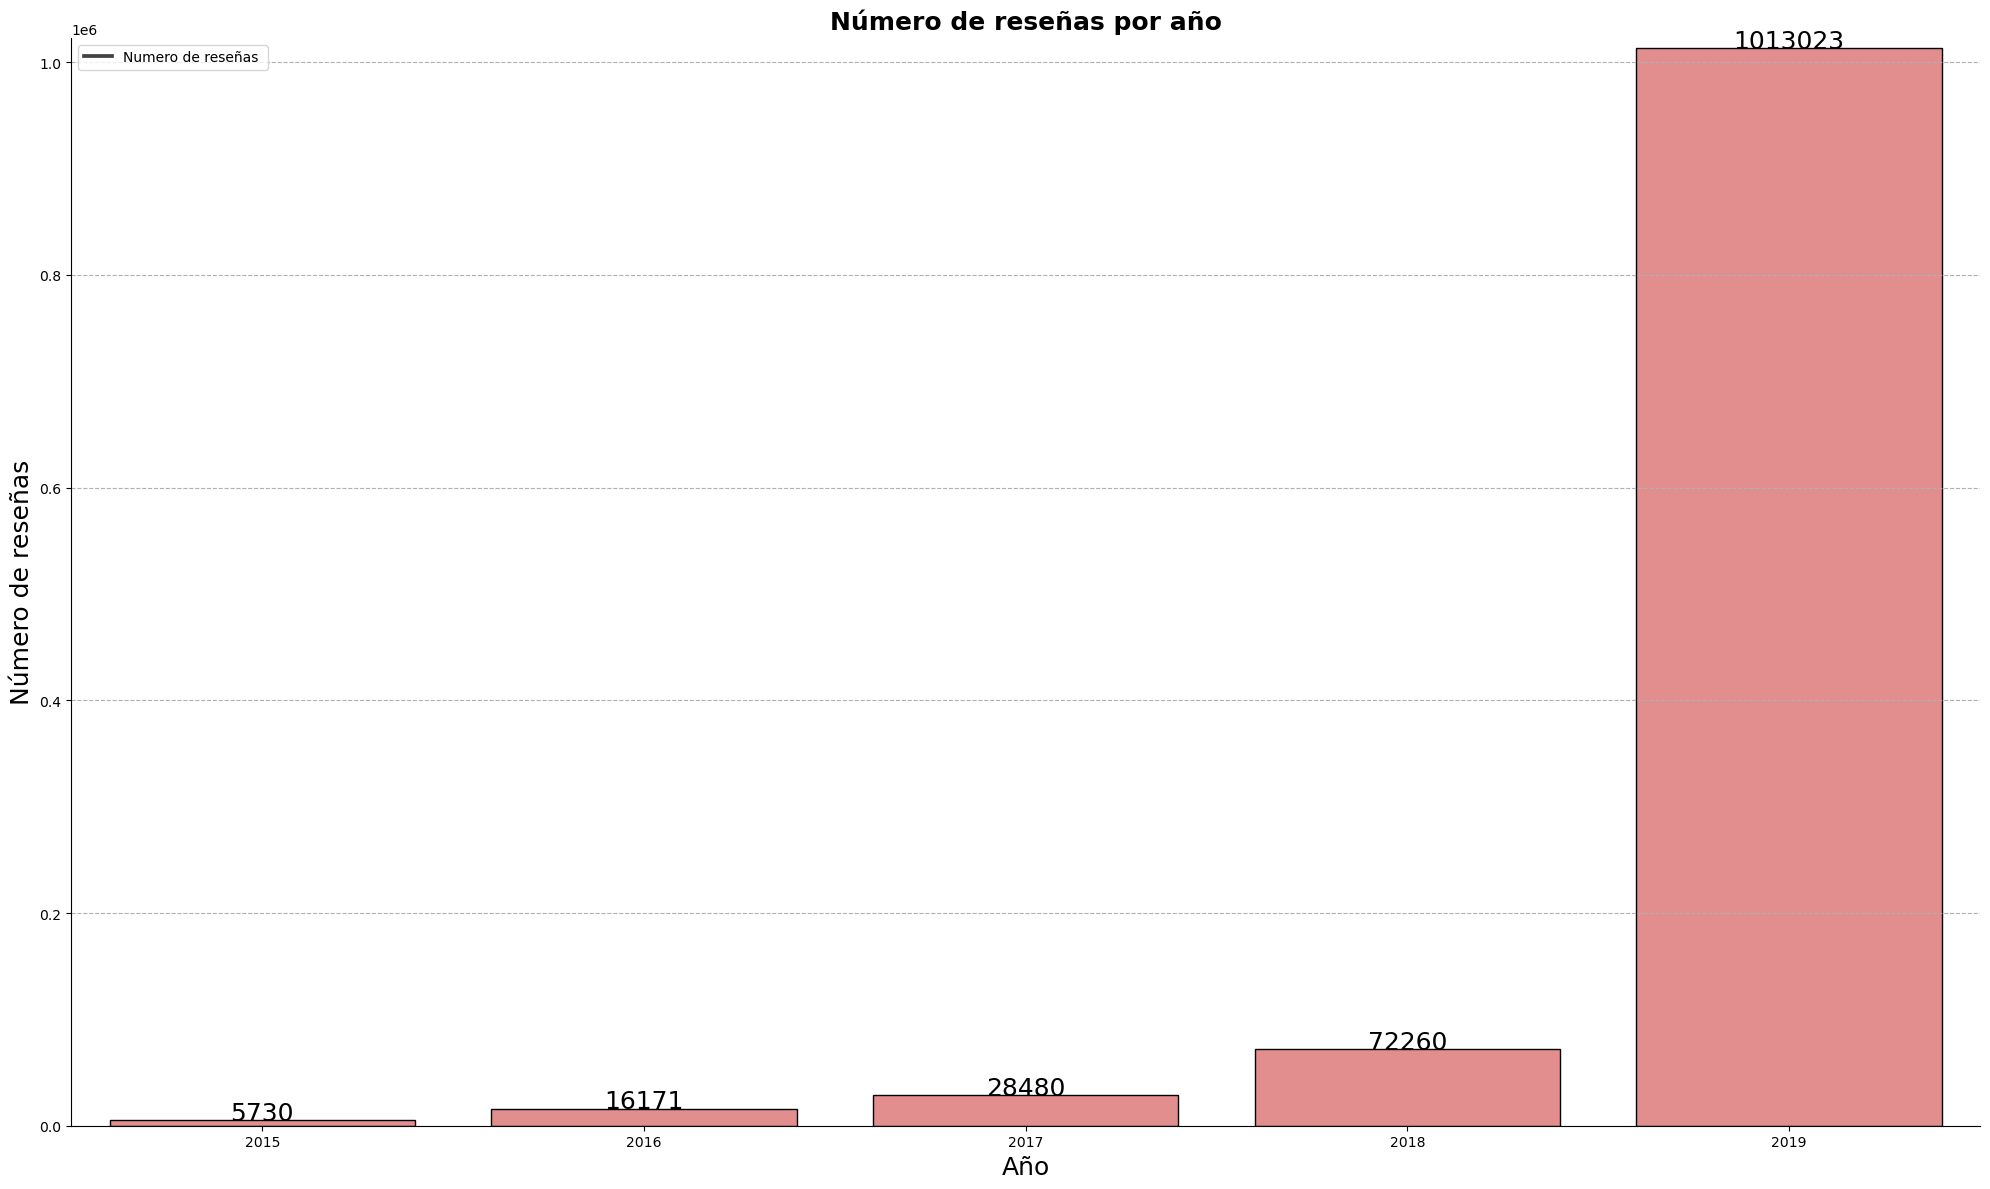

In [ ]:
fig,ax = plt.subplots(figsize = (20, 12))

sns.barplot(x=listaFechas, y=listaMostrar, color= 'lightcoral', edgecolor='black', linewidth=1)

ax.set_title('Número de reseñas por año', fontsize=18, fontweight='bold')
ax.set_xlabel('Año', fontsize=18)
ax.set_ylabel('Número de reseñas', fontsize=18)

for i, v in enumerate(listaMostrar):
    ax.text(i, v + 25, str(v), ha='center', fontsize=18)

    
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(["Numero de reseñas "])
plt.grid(axis='y', linestyle='--')

ax.set_ylim(0, max(listaMostrar) + 10000)
plt.tight_layout()
plt.show()
  #  plt.title("Monthly Reviews",color = 'white')


Aquí se puede observar el crecimiento de las reseñas no obstante al no quedar totalmente claro optamos por realizar un diagrama de puntos.

### Diagrama de Puntos de los años 2011-2019

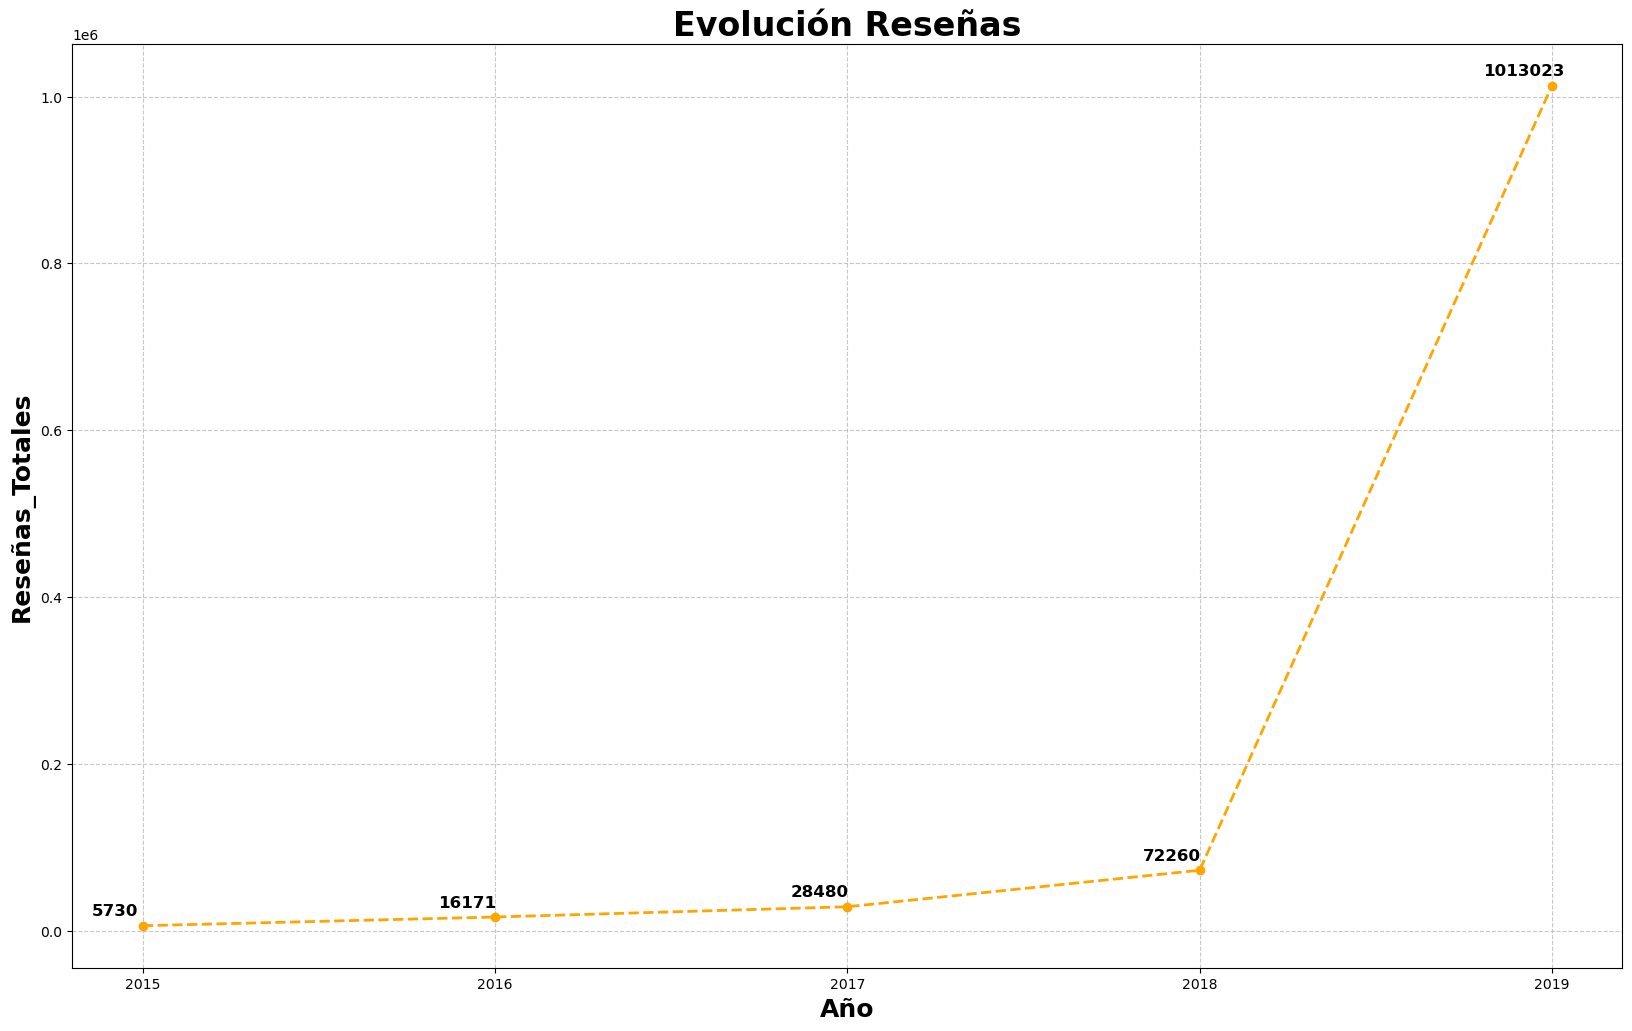

In [ ]:
#Grafico lineas
fig1,ax1 = plt.subplots(figsize = (20, 12))
plt.plot(listaFechas,listaMostrar , color='orange', marker='o', linestyle='--', linewidth=2)

# Add axis labels
plt.title('Evolución Reseñas', fontsize=24, fontweight='bold')
plt.xlabel('Año', fontsize=18, fontweight='bold')
plt.ylabel('Reseñas_Totales', fontsize=18, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.7)

# Show the value of each point
for i,j in zip(listaFechas,listaMostrar):
    ax1.annotate(str(j),xy=(i,j),xytext=(-20, 5), textcoords='offset points', ha='center', va='bottom', fontsize=12, fontweight = 'bold')

# Show the plot
plt.show()

Tras realizar este diagrama se observa un crecimiento muy exponencial en 2019, de manera que el diagrama de puntos es el mas adecuado para este escenario.